# Sex Analysis

In this project I am investigating whether when someone is born (in an Olympic cycle) is a statiscally significant indicator for whether they will become an olympian.\
In [Overview Analsysis](Overview%20Analysis.ipynb) I investigated this for the whole dataset and found *no* evidence that age is a significant indicator.\
Here I investigate whether this is still true when considering the sex of an athlete.

## Table of Contents
- [Data Preparation](#Data-Preparation)
- [Dataset Details](#Dataset-Details)
- [Normalised Age Distribution](#Normalised-Age-Distribution)
 - [Statistical Significance](#Statistical-Significance)
- [Conclusion](#Conclusion)

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import DataCleaner
%matplotlib inline

In [2]:
# Read in data
athlete_events_df=pd.read_csv("data/athlete_events.csv")
noc_regions_df=pd.read_csv("data/noc_regions.csv",index_col="NOC")

In [3]:
# Clean data (See DataCleaner.py for details)
athlete_df=DataCleaner.clean_athlete_events(athlete_events_df)
noc_df=DataCleaner.clean_noc_regions(noc_regions_df)

In [4]:
# Add Field
athlete_df["Medalist"]=athlete_df["Medal"].isin(["gold","silver","bronze"]) # boolean for whether athlete won a medal
athlete_df["Birth_Year"]=athlete_df["Year"]-athlete_df["Age"]

In [5]:
# Group data such that each athlete only has one entry
unique_athlete_df=DataCleaner.unique_athlete(athlete_df)
unique_athlete_df.head()

c:\users\dom\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Name,Sex,NOC,Season,Sport,Birth_Year,Num_Medals,Events,Years,Median_Age,Medalist
Athlete_ID,,,,,,,,,,,
2,a lamusi,M,chn,summer,judo,1989.0,0,[extra-lightweight],[2012],23,False
5,christine jacoba aaftink,F,ned,winter,speed skating,1967.0,0,"[500 metres, 1,000 metres]","[1988, 1992, 1994]",25,False
6,per knut aaland,M,usa,winter,cross country skiing,1961.0,0,"[10 kilometres, 50 kilometres, 10/15 kilometre...","[1992, 1994]",32,False
7,john aalberg,M,usa,winter,cross country skiing,1961.0,0,"[10 kilometres, 50 kilometres, 10/15 kilometre...","[1992, 1994]",32,False
10,"einar ferdinand ""einari"" aalto",M,fin,summer,swimming,1926.0,0,[400 metres freestyle],[1952],26,False


In [6]:
# Split data by sex
male_athletes_df=unique_athlete_df[unique_athlete_df["Sex"]=="M"]
female_athletes_df=unique_athlete_df[unique_athlete_df["Sex"]=="F"]

# Dataset Details

In [7]:
print("`male_athletes_df` contains {:,} athletes, {:,} of whom have won a medal.".format(male_athletes_df.shape[0],male_athletes_df["Medalist"].sum()))
print("`female_athletes_df` contains {:,} athletes, {:,} of whom have won a medal.".format(female_athletes_df.shape[0],female_athletes_df["Medalist"].sum()))

print("`athlete_df` contains {:,} entries.".format(athlete_df.shape[0]))
summer_games=athlete_df[athlete_df["Season"]=="summer"]
winter_games=athlete_df[athlete_df["Season"]=="winter"]
print("\t{:,} athletes".format(len(athlete_df["Athlete_ID"].unique())))
print("\t{:,} medals".format(athlete_df["Athlete_ID"].notnull().sum()))
print("\t{} summer games ({}-{}).".format(len(summer_games["Year"].unique()),summer_games["Year"].min(),summer_games["Year"].max()))
print("\t{} winter games ({}-{}).".format(len(winter_games["Year"].unique()),winter_games["Year"].min(),winter_games["Year"].max()))
print("\t{} sports ({} summer, {} winter).".format(len(athlete_df["Sport"].unique()),len(summer_games["Sport"].unique()),len(winter_games["Sport"].unique())))
print("\t{} events ({} summer, {} winter).\n".format(len(athlete_df["Event"].unique()),len(summer_games["Event"].unique()),len(winter_games["Event"].unique())))


`male_athletes_df` contains 64,016 athletes, 10,776 of whom have won a medal.
`female_athletes_df` contains 27,546 athletes, 5,333 of whom have won a medal.
`athlete_df` contains 200,969 entries.
	91,562 athletes
	200,969 medals
	18 summer games (1948-2016).
	18 winter games (1948-2014).
	41 sports (27 summer, 14 winter).
	278 events (221 summer, 67 winter).



# Overall Age Distribution

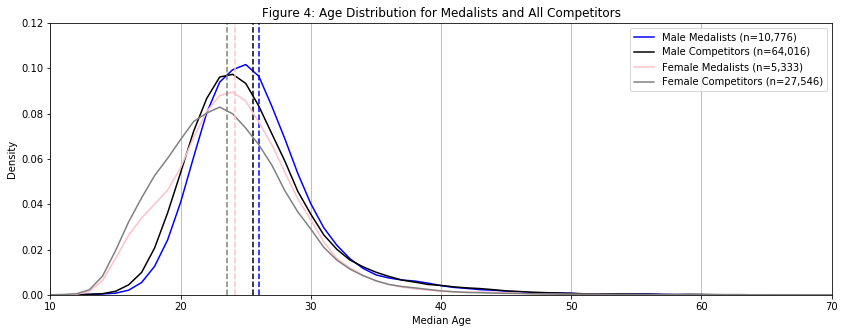

In [8]:
def plot_distribution(df:pd.DataFrame,ax,xlims:(int,int),ylims:(int,int),eval_points:[int],colours:(str,str),label_header:str):
    medalist_label="{} Medalists (n={:,})".format(label_header,df["Medalist"].sum())
    competitor_label="{} Competitors (n={:,})".format(label_header,df.shape[0])
    
    df[df["Medalist"]]["Median_Age"].plot.kde(ind=eval_points,xlim=xlims,ylim=ylims,label=medalist_label,color=colours[0],ax=ax)
    df["Median_Age"].plot.kde(ind=eval_points,xlim=xlims,ylim=ylims,label=competitor_label,color=colours[1],ax=ax)
    
    ax.axvline(x=df[df["Medalist"]]["Median_Age"].mean(),color=colours[0],ls="--")
    ax.axvline(x=df["Median_Age"].mean(),color=colours[1],ls="--",)    

fig,axes=plt.subplots(figsize=(14,5),nrows=1,ncols=1)
# kde plot of age distribution for medal winners against non-winners
# suggests medal winners are slightly older
xlims=(10*(unique_athlete_df["Median_Age"].min()//10),10*(unique_athlete_df["Median_Age"].max()//10))
ylims=(0,.12)
eval_points=[i for i in range(int(xlims[0]),int(xlims[1])+1)] # estimate distribution at each year

# Plot data
plot_distribution(male_athletes_df,axes,xlims,ylims,eval_points,["blue","black"],"Male")
plot_distribution(female_athletes_df,axes,xlims,ylims,eval_points,["pink","gray"],"Female")

# style chart
axes.set_title("Figure 4: Age Distribution for Medalists and All Competitors")
axes.set_xlabel("Median Age")
axes.xaxis.grid(True)
axes.legend()

plt.show()

This plot shows similar results to that of *Figure 1* with medalists appearing to be slightly older than competitors.\
The plot sugggests that female athletes are notably younger than male, with significantly more being under 20. This is likely due to sports such as gymnastics where young teenagers often compete.

# Normalised Age Distribution

c:\users\dom\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\dom\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Name,Sex,NOC,Season,Sport,Birth_Year,Num_Medals,Events,Years,Median_Age,Medalist,Cycle_Age
Athlete_ID,,,,,,,,,,,,
5,christine jacoba aaftink,F,ned,winter,speed skating,1967.0,0,"[500 metres, 1,000 metres]","[1988, 1992, 1994]",25,False,3.0
13,minna maarit aalto,F,fin,summer,sailing,1966.0,0,[windsurfer],"[1996, 2000]",32,False,2.0
14,pirjo hannele aalto (mattila-),F,fin,winter,biathlon,1962.0,0,[7.5 kilometres sprint],[1994],32,False,2.0
22,andreea aanei,F,rou,summer,weightlifting,1994.0,0,[super-heavyweight],[2016],22,False,2.0
26,agnes erika aanonsen (-eyde),F,nor,winter,luge,1967.0,0,[singles],[1984],17,False,3.0


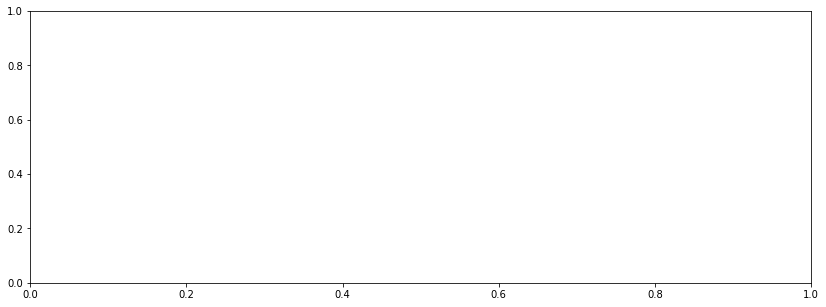

In [9]:
# Determine how many years after an olympics an athlete was born
# This is complicated by the fact that the summer & winter games were in sync until 1994
def add_cycle_age(df:pd.DataFrame) -> pd.DataFrame:
    if ("Cycle_Age" in df.columns): return df
    summer_athletes=(df["Season"]=="summer")
    pre_change_winter_athletes=((df["Season"]=="winter") & (df["Birth_Year"]<1994))
    post_change_winter_athletes=((df["Season"]=="winter") & (df["Birth_Year"]>=1994))

    df.loc[summer_athletes,"Cycle_Age"]=(df.loc[summer_athletes,"Birth_Year"]%4)
    df.loc[pre_change_winter_athletes,"Cycle_Age"]=(df.loc[pre_change_winter_athletes,"Birth_Year"]%4)
    df.loc[post_change_winter_athletes,"Cycle_Age"]=((df.loc[post_change_winter_athletes,"Birth_Year"]-2)%4)
    
    return df

male_athletes_df=add_cycle_age(male_athletes_df)
female_athletes_df=add_cycle_age(female_athletes_df)

female_athletes_df.head()

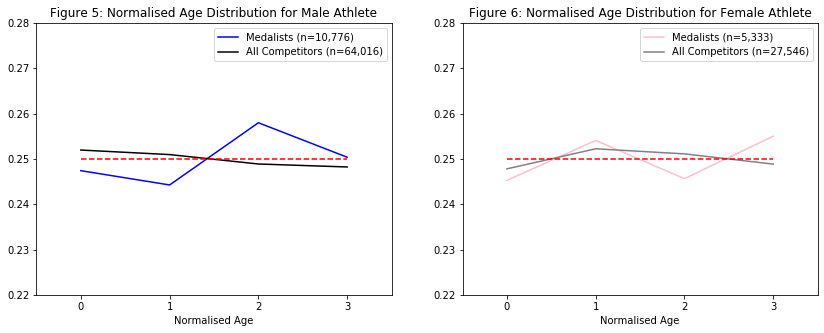

In [10]:
def plot_normalised_age(df:pd.DataFrame,ax,title:str,colours:(str,str)):
    medalists=df[df["Medalist"]]["Cycle_Age"].value_counts(normalize=True).sort_index()
    competitors=df["Cycle_Age"].value_counts(normalize=True).sort_index()

    xlims=(-.5,3.5)
    x_tick_labels=range(0,4)
    ylims=(.22,.28)
    y_tick_labels=[x/100 for x in range(int(100*ylims[0]),int(100*ylims[1])+1,1)]

    # Plot data for all athletes
    medalist_label="Medalists (n={:,})".format(df["Medalist"].sum())
    competitor_label="All Competitors (n={:,})".format(df.shape[0])
    medalists.plot(ax=ax,ylim=ylims,xlim=xlims,label=medalist_label,c=colours[0])
    competitors.plot(ax=ax,ylim=ylims,xlim=xlims,label=competitor_label,c=colours[1])

    ax.set_title(title)
    ax.axhline(y=.25,xmin=.125,xmax=.875,color="red",ls="--")
    ax.set_xlabel("Normalised Age")
    ax.set_xticks(x_tick_labels)
    ax.set_yticks(y_tick_labels)
    ax.legend()

fig,axes=plt.subplots(figsize=(14,5),nrows=1,ncols=2)
plot_normalised_age(male_athletes_df,axes[0],"Figure 5: Normalised Age Distribution for Male Athlete",colours=["blue","black"])
plot_normalised_age(female_athletes_df,axes[1],"Figure 6: Normalised Age Distribution for Female Athlete",colours=["pink","gray"])
plt.show()

Both plots suggest the distribution of normalised competitor ages is relatively uniform, although both show fewer olympians are born at the end of an olympic cycle.\
Both plots show much greater variation in the age distribution of medalists, but not the same variations which would explain why they were not so prominent in the plots of the whole population.\
As in [Overview Analsysis](Overview%20Analysis.ipynb) I am going to test whether these deviations from a uniform distribution are statistically significant.

## Statistical Significance

In [11]:
from scipy.stats import chisquare

In [12]:
def chisquare_uniform(df,col="Cycle_Age",print_vals=True) -> (float,float):
    f_obs=df[col].value_counts().sort_index().values
    f_exp=np.repeat(sum(f_obs)/len(f_obs),len(f_obs))
    if print_vals: print("Observed occs: {}.\nExpected occs: {}".format(f_obs,f_exp))
    return chisquare(f_obs,f_exp)

In [13]:
# male athletes
t_obs,p_value=chisquare_uniform(male_athletes_df)
print("t_obs={:.5f}.\np_value={:.8f}.\n{}Statistically Significant\n".format(t_obs,p_value,"" if (p_value<=.1) else "*Not* "))

# female athletes
t_obs,p_value=chisquare_uniform(female_athletes_df)
print("t_obs={:.5f}.\np_value={:.8f}.\n{}Statistically Significant\n".format(t_obs,p_value,"" if (p_value<=.1) else "*Not* "))

# male medalists
t_obs,p_value=chisquare_uniform(male_athletes_df[male_athletes_df["Medalist"]])
print("t_obs={:.5f}.\np_value={:.8f}.\n{}Statistically Significant\n".format(t_obs,p_value,"" if (p_value<=.1) else "*Not* "))

# female medalists
t_obs,p_value=chisquare_uniform(female_athletes_df[female_athletes_df["Medalist"]])
print("t_obs={:.5f}.\np_value={:.8f}.\n{}Statistically Significant\n".format(t_obs,p_value,"" if (p_value<=.1) else "*Not* "))

Observed occs: [16129 16065 15932 15890].
Expected occs: [16004. 16004. 16004. 16004.]
t_obs=2.34479.
p_value=0.50399490.
*Not* Statistically Significant

Observed occs: [6826 6948 6917 6855].
Expected occs: [6886.5 6886.5 6886.5 6886.5]
t_obs=1.35991.
p_value=0.71495905.
*Not* Statistically Significant

Observed occs: [2666 2632 2780 2698].
Expected occs: [2694. 2694. 2694. 2694.]
t_obs=4.46919.
p_value=0.21505492.
*Not* Statistically Significant

Observed occs: [1308 1355 1310 1360].
Expected occs: [1333.25 1333.25 1333.25 1333.25]
t_obs=1.77517.
p_value=0.62035232.
*Not* Statistically Significant



There is insufficient evidence to suggest that *any* of the distributions are **not** uniform.

# Conclusion
There is no statisically significant evidence that, when considering a person's sex, being born in a particular year of an olympic cycle increases the likelihood of you competing or medalling at an Olympics.